In [1]:
%load_ext sql

In [2]:
from pathlib import Path
from urllib.request import urlretrieve

if not Path("penguins.csv").is_file():
    urlretrieve(
        "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv",
        "penguins.csv",
    )

In [3]:
%sql duckdb://

In [4]:
%sql SELECT * FROM penguins.csv LIMIT 3

Running query in 'duckdb://'

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,39.1,18.7,181,3750,MALE
Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
Adelie,Torgersen,40.3,18.0,195,3250,FEMALE


In [5]:
%%sql
SELECT *
FROM penguins.csv
WHERE bill_length_mm > 40
LIMIT 3

Running query in 'duckdb://'

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
Adelie,Torgersen,42.0,20.2,190,4250,None
Adelie,Torgersen,41.1,17.6,182,3200,FEMALE


In [6]:
%%sql --save not_nulls --no-execute
SELECT *
FROM penguins.csv
WHERE bill_length_mm IS NOT NULL
AND bill_depth_mm IS NOT NULL

Running query in 'duckdb://'

Skipping execution...

## Plotting

<Axes: title={'center': "Boxplot from 'not_nulls'"}>

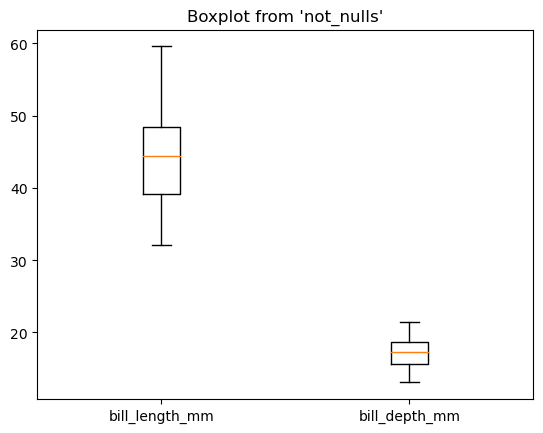

In [7]:
%sqlplot boxplot --column bill_length_mm bill_depth_mm --table not_nulls --with not_nulls

<Axes: title={'center': "Histogram from 'not_nulls'"}, ylabel='Count'>

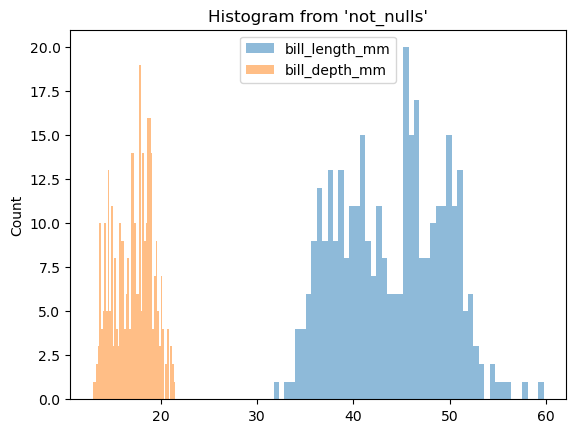

In [8]:
%sqlplot histogram --column bill_length_mm bill_depth_mm --table not_nulls --with not_nulls

## PANDAS integration

In [9]:
result = %sql SELECT * FROM penguins.csv

Running query in 'duckdb://'

In [12]:
df = result.DataFrame()

In [13]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Introduction

In [14]:
%%sql sqlite://
CREATE TABLE languages (name, rating, change);
INSERT INTO languages VALUES ('Python', 14.44, 2.48);
INSERT INTO languages VALUES ('C', 13.13, 1.50);
INSERT INTO languages VALUES ('Java', 11.59, 0.40);
INSERT INTO languages VALUES ('C++', 10.00, 1.98);

1 rows affected.

1 rows affected.

1 rows affected.

1 rows affected.

++
||
++
++

In [15]:
%sql SELECT * FROM languages

Running query in 'sqlite://'

name,rating,change
Python,14.44,2.48
C,13.13,1.5
Java,11.59,0.4
C++,10.0,1.98


In [16]:
result = _
print(result)

+--------+--------+--------+
|  name  | rating | change |
+--------+--------+--------+
| Python | 14.44  |  2.48  |
|   C    | 13.13  |  1.5   |
|  Java  | 11.59  |  0.4   |
|  C++   |  10.0  |  1.98  |
+--------+--------+--------+
